# Abstract

Идеи экспериментов:
- Проварьировать число треков, из которых случайным образом берется рекомендация (в нейросетевом рекоммендере CONTEXTUAL это число равно 100)
- Применять fallback не только в случае отсутствия рекомендаций, но и в случае, когда пользователь быстро переключил трек

# Детали

## Эксперимент 1

Как делались рекомендации для текущего трека в нейросетевом рекоммендере CONTEXTUAL: для каждого другого трека получали скоры, означающие то, насколько близок эмбеддинг этого трека к текущему, после чего брались топ k треков из этого списка, и из них выдавался рандомный. На семинаре мы брали k = 100, я же решил проверить, получится ли значительно улучшить метрики, изменив данное значение. 

Для удобства файл с рекомендациями был перезаписан следующим образом: для каждого трека рекомендации генерировались в порядке убывания скоров. Таким образом из заведомо сгенерированного списка можно удобно выделять первые k треков с наибольшими скорами.

Далее был проведен эксперимент в котором:
- Treatment 1: CONTEXTUAL с k = 10
- Treatment 2: CONTEXTUAL с k = 25
- Treatment 3: CONTEXTUAL с k = 50
- Control: CONTEXTUAL с k = 100

Результаты можно видеть в таблице ниже:

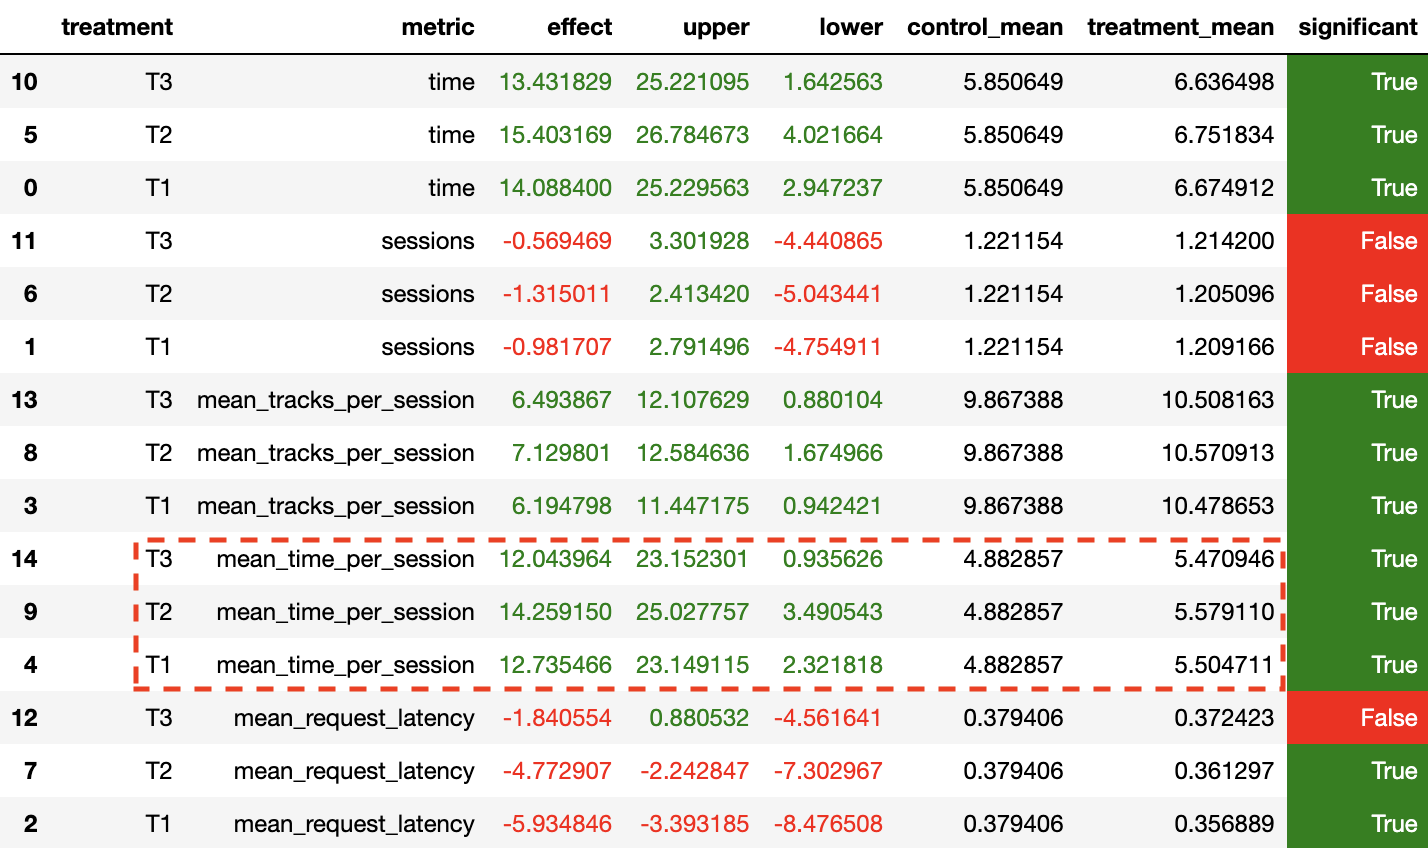

Как можно видеть, наибольшего прироста целевой метрики mean_time_per_session удалось достичь при k = 25, причем прирост относительно бейзлайна оказался статистически значимым

## Эксперимент 2

Идея следующего эксперимента заключается в следующем: В рекомендере CONTEXTUAL если пользователь быстро переключает трек, то мы все равно предлагаем ему трек из рекомендаций к данному, хотя это не очень логично, ведь скорее всего пользователю текущий трек не понравился. Поэтому можно попробовать рекомендовать ему случайный трек в случае, если время прослушивания текущего трека меньше некоторого порогового значения time_threshold. Назовем такой рекоммендер MY_RECOMMENDER.

В связи с этими рассуждениями был проведен следующий эксперимент:
- Treatment 1: CONTEXTUAL с k = 25 (наилучший из предыдущего эксперимента)
- Treatment 2: MY_RECOMMENDER с k = 25 и time_threshold = 0.05
- Treatment 3: MY_RECOMMENDER с k = 25 и time_threshold = 0.1
- Treatment 4: MY_RECOMMENDER с k = 25 и time_threshold = 0.2
- Control: CONTEXTUAL с k = 100

Результаты можно видеть в таблице ниже:

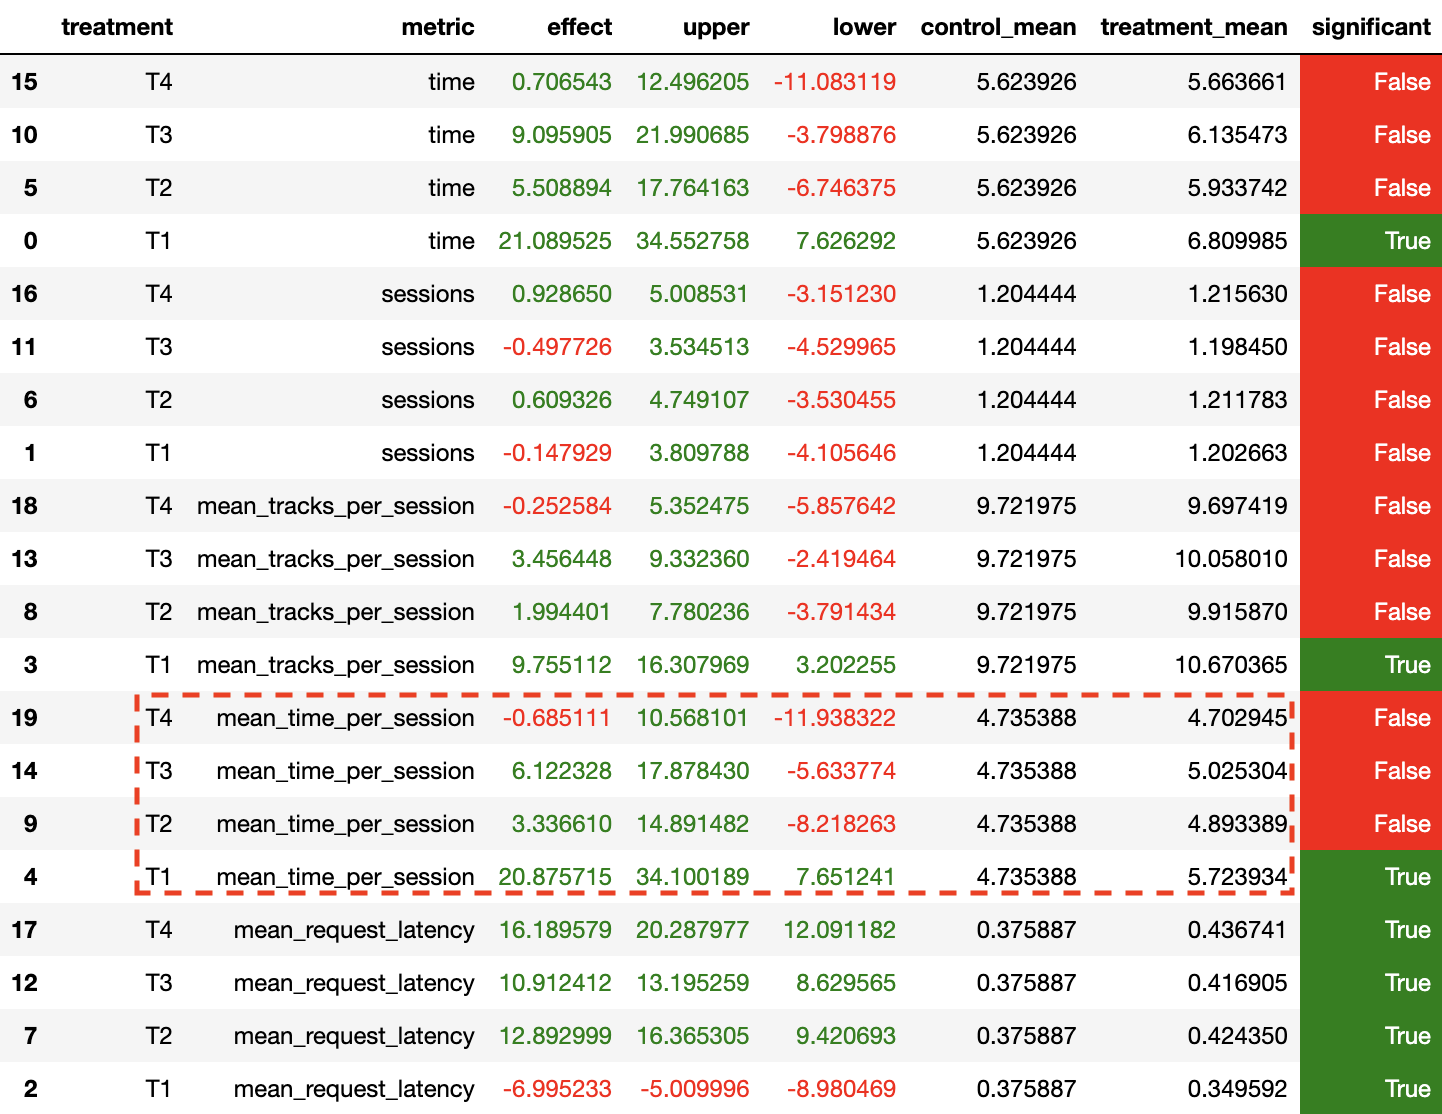

Как можно видеть при таком подходе во всех случаях результаты оказались сильно хуже, чем при использовании CONTEXTUAL с k = 25. Вероятно рекомендации случайного трека сильно хуже, чем рекомендация трека, похожего на текущий, даже при условии того, что текущий трек пользователю не понравился.

# Результаты A/B эксперимента

Как итог можно видеть, что первый эксперимент дал свои плоды, и нам получилось значительно улучшить целевую метрику, однако вторая идея не дала результатов.

Итоговый прирост метрики наилучшего рекоммендера относительно бейзлайна можно видеть в таблице:

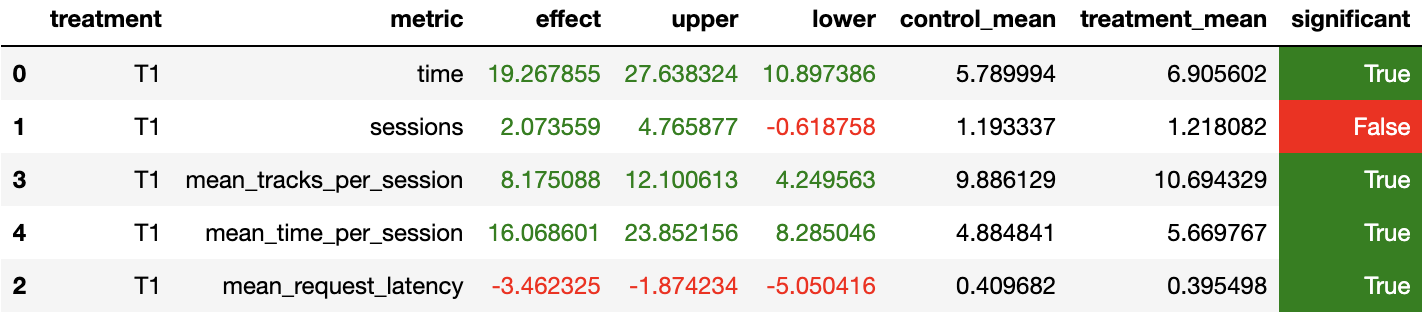